In [ ]:
!pip install --upgrade imbalanced-learn
!pip install optuna

     |████████████████████████████████| 308 kB 24.4 MB/s 
     |████████████████████████████████| 80 kB 9.4 MB/s 
     |████████████████████████████████| 209 kB 60.5 MB/s 
     |████████████████████████████████| 75 kB 4.2 MB/s 
     |████████████████████████████████| 149 kB 68.8 MB/s 
     |████████████████████████████████| 112 kB 70.6 MB/s 
     |████████████████████████████████| 49 kB 6.2 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=f8264183d53df9bd5181bbc6e8c3214367593995985de3fb277b51a464eb27be
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


## Επισκόπηση

* Σύντομη παρουσίαση του dataset δηλαδή ποιο είναι το πρόβλημα που περιγράφει. <br/><br/>
To dataset περιέχει δεδομένα που έχουν συλλεχθεί από διαδικτυακές παρτίδες πόκερ. Συγκεκριμένα κάθε εγγραφή του dataset περιγράφει το πως έπαιξε ένας παίκτης σε κάποια παρτίδα και το τελικό αποτέλεσμα, δηλ αν κέρδισε ή αν έχασε<br/><br/>

* Χρειάστηκε να κάνετε μετατροπές στα αρχεία plain text για την εισαγωγή του; αν ναι, ποιες είναι αυτές; <br/><br/>
Το dataset αποτελείται από ένα αρχείο που περιέχει επικεφαλίδες στο οποίο δεν έγινε καμία μετατροπή<br/><br/>

* Δώστε το πλήθος δειγμάτων και χαρακτηριστικών, και το είδος όλων των χαρακτηριστικών. Υπάρχουν μη διατεταγμένα χαρακτηριστικά και ποια είναι αυτά; <br/><br/>
Κάθε δείγμα από τα 102615 του dataset περιέχει 35 χαρακτηριστικά ένα εκ των οποίων είναι το αποτέλεσμα και ένα το τελικό ποσό που κέρδισε ή έχασε ο παίκτης. Ορισμένα από τα υπόλοιπα χαρακτηριστικά αφορούν τη συγκεκριμένη παρτίδα και είναι κοινά για εγγραφές για διαφορετικούς παίκτες στην ίδια παρτίδα. Τέτοια χαρακτηριστικά είναι το id της παρτίδας, ο χρόνος διεξαγωγής της, τα χαρτιά που κατέβηκαν στο board, το μέγεθος του τραπεζιού, ο αριθμός παικτών και άλλα. Υπάρχουν επίσης χαρακτηριστικά που περιγράφουν πως έπαιξε ο συγκεκριμένος παίκτης στη συγκεκριμένη παρτίδα και αυτά είναι η θέση του στο τραπέζι, τα χαρτιά του, οι ενέργειες και τα πονταρίσματά του σε κάθε γύρο πονταρίσματος και άλλα.<br/><br/>


* Υπάρχουν επικεφαλίδες; Αρίθμηση γραμμών; <br/><br/>
Υπάρχουν επικεφαλίδες αλλά οι γραμμές δεν είναι αριθμημένες.<br/><br/>

* Ποιες είναι οι ετικέτες των κλάσεων και σε ποια κολόνα βρίσκονται; <br/><br/>
Οι ετικέτες των κλάσεων βρίσκονται στην κολόνα result και είναι οι εξης:
  * gave up: Ο παίκτης αποσύρθηκε από την παρτίδα 
  * lost: Ο παίκτης έμεινε στη διεκδίκηση του γύρου μέχρι το τέλος, έδειξε τα χαρτιά του αλλά έχασε γιατί κάποιος άλλος παίκτης είχε πιο ισχυρό συνδυασμό χαρτιών
  * took chips: Ο παίκτης ήταν ο μόνος που παρέμεινε στην παρτίδα αφού όλοι οι άλλοι αποσύρθηκαν 
  * won: Ο παίκτης έμεινε στη διεκδίκηση του γύρου μέχρι το τέλος, έδειξε τα χαρτιά του αλλά κέρδισε γιατί είχε τον πιο ισχυρό συνδυασμό χαρτιών<br/><br/>

* Υπάρχουν απουσιάζουσες τιμές; Πόσα είναι τα δείγματα με απουσιάζουσες τιμές και ποιο το ποσοστό τους επί του συνόλου; <br/><br/>
Οι μόνες απουσιάζουσες τιμές βρίσκονται στο χαρακτηριστικό combination (που είναι ο συνδυασμός των χαρτιών του παίκτη). Παρόλα αυτά η παράληψή τους δεν αποτελεί αμέλεια αλλά σημαντικό στοιχείο για τον τρόπο παιχνιδιού του παίκτη. Για την ακρίβεια σημαίνει ότι ο παίκτης δεν παρέμεινε μέχρι το τέλος της παρτίδας (είτε επειδή αποσύρθηκε, είτε επειδή αποσύρθηκαν όλοι οι άλλοι και η παρτίδα δεν ολοκληρώθηκε). Για αυτό το λόγο οι απουσιάζουσες τιμές γεμίζονται με τιμή "no info" ώστε να χρησιμοποιηθούν ως πληροφορία κατά την εκπαιδευση του νευρωνικού δικτύου.<br/><br/>

* Ποιο είναι το πλήθος των κλάσεων και τα ποσοστά δειγμάτων τους επί του συνόλου; Αν θεωρήσουμε ότι ένα dataset είναι μη ισορροπημένο αν μια οποιαδήποτε κλάση είναι 1.5 φορά πιο συχνή από κάποια άλλη (60%-40% σε binary datasets) εκτιμήστε αν το dataset είναι ισορροπημένο ή όχι <br/><br/>
Όπως φαίνεται και πιο κάτω η κατανομή των κλάσεων των 102615 δειγμάτων είναι η εξής: { gave up: 50728 (49%), lost: 10028 (10%), took chips: 31087 (31%), won: 10772 (10%) } και παρατηρείται ότι η πρώτη κλάση έχει σημαντικά περισσότερα δείγματα από τις υπόλοιπες άρα το dataset δεν είναι ισορροπημένο


## Μετρική

Επιλέχθηκε ως μετρική η F1 διότι συνδυάζει τα αποτελέσματα των μετρικών recall και precision και δίνει μια πιο γενική άποψη για την επίδοση του ταξινομητή, παρόλο που το αποτέλεσμα της δεν ερμηνεύεται πρακτικά τόσο εύκολα όσο της accuracy. Το πρόβλημα το οποίο πραγματεύεται το dataset δεν έχει να κάνει με κάποιο πρόβλημα υγείας ή κάτι αντίστοιχο επομένως δεν χρειάζεται να αξιολογηθεί η επίδοση του ταξινομητή δίνοντας προτεραιότητα σε κάποιο συγκεκριμένο κριτήριο όπως κάνουν οι recall και precision. Επίσης η F1 διαχειρίζεται καλύτερα μη-ισορροπημένα dataset όπως αυτό που χρησιμοποιούν οι out-of-the box ταξινομητές άρα ή σύγκριση με τους βελτιστοποιημένους, που χρησιμοποιούν ισορροπημένα datasets, είναι πιο αντικειμενική.


## Cross Validation

Λόγω του μεγάλου αριθμού εγγραφών στο dataset επιλέχθηκε να μη γίνει cross validation για να μειωθεί ο συνολικός χρόνος εκτέλεσης

In [ ]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# df = pd.read_csv(os.path.join(dirname, filename))
url = 'https://raw.githubusercontent.com/ChristosHadjichristofi/NN_data/main/one_dollar_spin_and_go.csv'
df = pd.read_csv(url)

df.head()
# print(df)

,buyin,tourn_id,table,hand_id,date,time,table_size,level,playing,seat,name,stack,position,action_pre,action_flop,action_turn,action_river,all_in,cards,board_flop,board_turn,board_river,combination,pot_pre,pot_flop,pot_turn,pot_river,ante,blinds,bet_pre,bet_flop,bet_turn,bet_river,result,balance
0,$0.92+$0.08,2929450288,1,215051507105,2020-06-07,18:15:09,3,1,3,1,fa538846,500,BTN,folds,x,x,x,False,8d Qh,0,0,0,NaN,30,30,30,30,0,0,0,0,0,0,gave up,0
1,$0.92+$0.08,2929450288,1,215051507105,2020-06-07,18:15:09,3,1,3,2,676c5599,500,SB,folds,x,x,x,False,--,0,0,0,NaN,30,30,30,30,0,10,10,0,0,0,gave up,-10
2,$0.92+$0.08,2929450288,1,215051507105,2020-06-07,18:15:09,3,1,3,3,7055f691,500,BB,x,x,x,x,False,--,0,0,0,NaN,30,30,30,30,0,20,20,0,0,0,took chips,10
3,$0.92+$0.08,2929450288,1,215051520234,2020-06-07,18:15:23,3,1,3,1,fa538846,500,BB,raises,bets-doesn't,x,x,False,Ks 4s,Ad Kh 4c,0,0,NaN,120,180,180,180,0,20,60,60,0,0,took chips,60
4,$0.92+$0.08,2929450288,1,215051520234,2020-06-07,18:15:23,3,1,3,2,676c5599,490,BTN,folds,x,x,x,False,--,Ad Kh 4c,0,0,NaN,120,180,180,180,0,0,0,0,0,0,gave up,0


In [ ]:
labels_df = df.iloc[: , -2] # τα labels είναι στην στήλη results
features_df = df.copy()
del features_df["result"] # features είναι όλες οι στήλες εκτός από την results 

print(features_df.shape)
print(labels_df.shape)
print(np.unique(labels_df))

(102615, 34)
(102615,)
['gave up' 'lost' 'took chips' 'won']


## Προεπεξεργασία

### Αφαίρεση χαρακτηριστικών

#### Όπως προαναφέρθηκε, η απουσία τιμής για το χαρακτηριστικό combination δεν είναι παράληψη κατά τη δημιουργεί του dataset αλλά αποτελεί σημαντική ένδειξη ότι ο εκάστοτε παίκτης δεν ολοκλήρωσε την παρτίδα επειδή είτε έκανε "gave up" είτε επειδή έκανε "took chips" επομένως η τιμή NaN αντικαθίσταται με "no info" για να μπορεί να χρησιμοποιηθεί από τους ταξινομητές

In [ ]:
features_df["combination"] = features_df['combination'].replace(np.nan, "no info")
features_df["combination"] = features_df["combination"].replace('a full house.*', 'a full house', regex=True)
features_df["combination"] = features_df["combination"].replace('two pair.*', 'two pair', regex=True)
features_df["combination"] = features_df["combination"].replace('a straight.*', 'a straight', regex=True)
features_df["combination"] = features_df["combination"].replace('a flush.*', 'a flush', regex=True)
features_df["combination"] = features_df["combination"].replace('three of a kind.*', 'three of a kind', regex=True)
features_df["combination"] = features_df["combination"].replace('a pair.*', 'a pair', regex=True)
features_df["combination"] = features_df["combination"].replace('four of a kind.*', 'four of a kind', regex=True)
print(np.unique(features_df["combination"]))

['a Royal Flush' 'a flush' 'a full house' 'a pair' 'a straight'
 'four of a kind' 'high card Ace' 'high card Jack' 'high card King'
 'high card Nine' 'high card Queen' 'high card Ten' 'no info'
 'three of a kind' 'two pair']


#### Χαρακτηριστικά για τα οποία ένας αντίπαλος παίκτης δεν μπορεί να έχει πληροφορία (δλδ τα χαρτιά του αντιπάλου) πρέπει να αφαιρεθούν

In [ ]:
del features_df["cards"] 
feature_names = np.array(features_df.columns) # αποθηκευση ονομάτων χαρακτηριστικών

#### Χαρακτηριστικά που έχουν ίδια τιμή για κάθε εγγραφή του dataset δεν προσφέρουν πληροφορία και μπορούν να αφαιρεθούν

In [ ]:
for feature_name in feature_names:
    if(len(np.unique(features_df[feature_name])) == 1): 
        print(feature_name)
        del features_df[feature_name]

buyin
table
table_size
ante


#### Χαρακτηριστικά που δεν προσφέρουν ουσιαστική πληροφορία (πχ ημερομηνία, tour_id) μπορούν να αφαιρεθούν. 

*Παρατήρηση: Υπό μία ευρεία έννοια θεωρήθηκε ότι ο συνδιασμός ημερομηνίας και ονόματος παίκτη μπορεί να προσφέρει πληροφορία αν θεωρηθεί ότι ο παίκτης βελτιώνει την επίδοσή του σε βάθος χρόνου αλλά θεωρήθηκε ότι μια τέτοια πληροφορία δεν είναι σημαντική συγκριτικά με τις υπόλοιπες. Επίσης το χαρακτηριστικό balance αφαιρέθηκε διότι πρακτικά είναι πληροφορία που προκείπτει από το result. Επιπλέον το χαρακτηριστικό seat αναφέρεται στην αρίθμηση της καρέκλας του παίκτη και όχι της θέσης του στο παιχνίδι (δλδ το χαρακτηριστικό position που παρέμεινε)*

In [ ]:
del features_df['tourn_id']
del features_df['hand_id']
del features_df['date']
del features_df['time']
del features_df['seat']
del features_df['balance']

feature_names = np.array(features_df.columns) 

### Απόδοση αριθμητικής τιμή στα χαρακτηριστικά

#### Χαρακτηριστικό Combination
*Παρατηρήσεις: Το χαρακτηριστικό αυτό παίρνει πολύ μεγάλο εύρος τιμών. Χωρίς πολύ σημαντική απώλεια πληροφορίας, οι επεξηγήσεις για το ποιά χαρτιά δημιουργούν τους συνδυασμούς κάθε παίκτη αφαιρέθηκαν, δλδ το four of a kind με Άσσους έχει πλέον ίδιο βάρος με four of a kind με ρηγάδες. Αυτό έγινε για να περιοριστεί το εύρος τιμών και να αντικατασταθούν οι τιμές με αριθμητικές* 

In [ ]:
combination_mapping = { 'a Royal Flush':0, 'four of a kind':1, 'a full house':2, 'a flush':3, 'a straight':4, 
                       'three of a kind':5, 'two pair':6, 'a pair':7, 'high card Ace':8, 'high card King':9,
                       'high card Queen':9, 'high card Jack':10, 'high card Ten':11, 'high card Nine':12, 'no info':13 }

features_df["combination"] = features_df["combination"] .map(combination_mapping)

print(np.unique(features_df["combination"]))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]


In [ ]:
mapping = {}
for feature_name in feature_names:
    if(type(features_df[feature_name][0]) == str): 
        print(feature_name)
        mapping[feature_name] = {label:idx for idx,label in enumerate(np.unique(features_df[feature_name]))}
        features_df[feature_name] = features_df[feature_name] .map(mapping[feature_name])
        

name
position
action_pre
action_flop
action_turn
action_river
board_flop
board_turn
board_river


#### Ετικέτες - Labels

In [ ]:
print(np.unique(labels_df))
original_labels = (np.unique(labels_df))
label_mapping = { 'gave up':0, 'lost':1, 'took chips':2, 'won':3 }
labels_df_mapped = labels_df.map(label_mapping)
print(np.unique(labels_df_mapped))


['gave up' 'lost' 'took chips' 'won']
[0 1 2 3]


### Δημιουργία np arrays

In [ ]:
# print(features_df)

feature_names = np.array(features_df.columns) # αποθηκευση ονομάτων χαρακτηριστικών
print(feature_names)

np_labels = labels_df_mapped.values.flatten()
print(np.unique(np_labels))

np_features = features_df.values
print(np_features.shape)

['level' 'playing' 'name' 'stack' 'position' 'action_pre' 'action_flop'
 'action_turn' 'action_river' 'all_in' 'board_flop' 'board_turn'
 'board_river' 'combination' 'pot_pre' 'pot_flop' 'pot_turn' 'pot_river'
 'blinds' 'bet_pre' 'bet_flop' 'bet_turn' 'bet_river']
[0 1 2 3]
(102615, 23)


In [ ]:
print(original_labels)
print(np.unique(np_labels))
print(np.bincount(np_labels))

['gave up' 'lost' 'took chips' 'won']
[0 1 2 3]
[50728 10028 31087 10772]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# no sampling
train, test, train_labels, test_labels = train_test_split(np_features, np_labels, test_size = 0.3)

###################################################################################################
ratio = 0.1
N = int(len(np_labels) * ratio)
sss = StratifiedShuffleSplit(n_splits = 1, test_size = int(0.3 * N), train_size = int(0.7 * N), random_state = 0)

for train_index, test_index in sss.split(np_features, np_labels):
  train_sss, test_sss = np_features[train_index], np_features[test_index]
  train_labels_sss, test_labels_sss = np_labels[train_index], np_labels[test_index]

print(train.shape)
print(test.shape)
print(train_labels.shape)
print(test_labels.shape)
print(train_sss.shape)
print(test_sss.shape)
print(train_labels_sss.shape)
print(test_labels_sss.shape)

(71830, 23)
(30785, 23)
(71830,)
(30785,)
(7182, 23)
(3078, 23)
(7182,)
(3078,)


## Out of the box

### Dummy Classifier

In [ ]:
from sklearn.dummy import DummyClassifier

dc_uniform = DummyClassifier(strategy="uniform")
dc_constant_0 = DummyClassifier(strategy="constant", constant=0)
dc_constant_1 = DummyClassifier(strategy="constant", constant=1)
dc_constant_2 = DummyClassifier(strategy="constant", constant=2)
dc_constant_3 = DummyClassifier(strategy="constant", constant=3)
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_stratified = DummyClassifier(strategy="stratified")

# dictionary to store all classifier without optimization preds
predictions = {}

# with the fit method we train the classifier with the train set
# with the predict method predictions occur based on the input data

dc_uniform.fit(train, train_labels)
predictions["DC Uniform"] = dc_uniform.predict(test)

dc_constant_0.fit(train, train_labels)
predictions["DC Constant 0"] = dc_constant_0.predict(test)

dc_constant_1.fit(train, train_labels)
predictions["DC Constant 1"] = dc_constant_1.predict(test)

dc_constant_2.fit(train, train_labels)
predictions["DC Constant 2"] = dc_constant_2.predict(test)

dc_constant_3.fit(train, train_labels)
predictions["DC Constant 3"] = dc_constant_3.predict(test)

dc_most_frequent.fit(train, train_labels)
predictions["DC Most Frequent"] = dc_most_frequent.predict(test)

dc_stratified.fit(train, train_labels)
predictions["DC Stratified"] = dc_stratified.predict(test)

In [ ]:
f1 = {}

def metrics_info(classifier_name, preds, isSSS):
  if isSSS:
    f1[classifier_name] = f1_score(test_labels_sss, preds, average = "macro")
  else:
    f1[classifier_name] = f1_score(test_labels, preds, average = "macro")

# Dummy Metrics
metrics_info("DC Uniform", predictions["DC Uniform"], False)
metrics_info("DC Constant 0", predictions["DC Constant 0"], False)
metrics_info("DC Constant 1", predictions["DC Constant 1"], False)
metrics_info("DC Constant 2", predictions["DC Constant 2"], False)
metrics_info("DC Constant 3", predictions["DC Constant 3"], False)
metrics_info("DC Most Frequent", predictions["DC Most Frequent"], False)
metrics_info("DC Stratified", predictions["DC Stratified"], False)

### MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

clf = MLPClassifier()
clf.fit(train, train_labels)
predictions["MLP"] = clf.predict(test)
metrics_info("MLP", predictions["MLP"], False)

### SVM

In [ ]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(train_sss, train_labels_sss)
predictions["SVM"] = svm.predict(test_sss)
metrics_info("SVM", predictions["SVM"], True)

#### Αποτελέσματα και Παρατηρήσεις

In [ ]:
print("\033[4m\033[1mF1 Score\033[0m\n")

data = []
data.append(list(f1.values()))

pd.DataFrame(data, index = ["F1 Score"], columns = list(f1.keys()))

F1 Score



,DC Uniform,DC Constant 0,DC Constant 1,DC Constant 2,DC Constant 3,DC Most Frequent,DC Stratified,MLP,SVM
F1 Score,0.224183,0.164783,0.045354,0.115697,0.048581,0.164783,0.248766,0.786188,0.284531


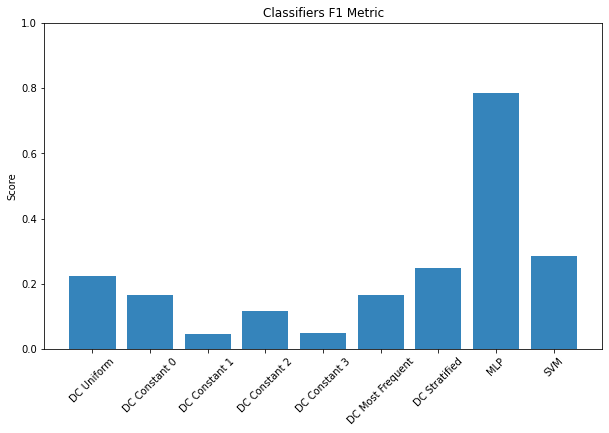

In [ ]:
classifiers = list(f1.keys())
scores = list(f1.values())

plt.figure(figsize = (10,6))
y_pos = np.arange(len(classifiers))
plt.bar(y_pos, scores, align='center', alpha = 0.9)
plt.ylim(0, 1)
plt.xticks(y_pos, classifiers, rotation = 45)
plt.ylabel('Score')
plt.title('Classifiers F1 Metric')
plt.show()

Παρατηρήσεις

Η επίδοση του SVM είναι κοντά στο 0.25 το οποίο είναι πολύ κοντά στην επίδοση που έχει ο ταξινομητής DC stratified που επιλέγει τυχαία σύμφωνα με την κατανομή των δεδομένων σε κλάσεις. Επομενως προκύπτει ότι ο SVM χωρίς βελτιστοποίηση έχει πολύ κακή επίδοση. Από την άλλη ο MLP χωρίς βελτιστοποίηση έχει αρκετά καλή επίδοση κοντά στο 0.8. Για τους υπόλοιπους ταξινομητές παρατηρείται ότι οι επιδόσεις τους είναι αναμενόμενα χαμηλές και εξαρτώνται από την κατανομή των δεδομένων σε κλάσεις.

## Βελτιστοποίηση με Optuna

### MLP

In [ ]:
import optuna
from sklearn.metrics import mean_squared_error
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA

n_trials = 50

def objective_mlp(trial):
  # selector
  train_var = train.var(axis = 0)
  max_variance = np.max(train_var)
  vthreshold = list(np.arange(start = 0, stop = int(max_variance) + 1, step = 25000))
  # threshold = trial.suggest_categorical("threshold", vthreshold)

  # scaler
  scaler_option = trial.suggest_categorical("scaler", ["StandardScaler", "MinMaxScaler"])

  # n component values (for pca)
  n_components = [5,10,15,20,23]
  n_comp = trial.suggest_categorical("n_components", n_components)

  # mlp hyperparams
  hidden_layer_sizes = trial.suggest_categorical("hidden_layer_sizes", [(50,), (100,), (200,), (50,100,), (100,50,), (100,200,), (200,50,), (50,100,200,), (200,100,50,)])
  activation = trial.suggest_categorical("activation", ["logistic", "relu", "identity", "tanh"])
  solver = trial.suggest_categorical("solver", ["adam", "sgd", "lbfgs"])
  learning_rate = trial.suggest_categorical("learning_rate", ["constant", "invscaling", "adaptive"])
  max_iter = trial.suggest_categorical("max_iter", [100, 200, 300])
  tol = trial.suggest_categorical("tol", [1e-3, 1e-4, 1e-5])
  early_stopping = trial.suggest_categorical("early_stopping", [False, True])
  n_iter_no_change = trial.suggest_categorical("n_iter_no_change", [5, 10, 15])

  # create pipeline
  selector = VarianceThreshold()
  scaler = StandardScaler() if scaler_option == "StandardScaler" else MinMaxScaler()
  ros = RandomOverSampler()
  pca = PCA(n_components = n_comp)
  mlp = MLPClassifier(hidden_layer_sizes = hidden_layer_sizes, 
                      activation = activation, solver = solver, 
                      learning_rate = learning_rate, max_iter = max_iter,
                      tol = tol, early_stopping = early_stopping,
                      n_iter_no_change = n_iter_no_change)
  
  pipeline = Pipeline(steps = [("sampler", ros), ("selector", selector), ("scaler", scaler), ("pca", pca), ("mlp", mlp)])
  
  # train model
  pipeline.fit(train, train_labels)

  # prediction
  predictions["MLP Opt"] = pipeline.predict(test)
  metrics_info("MLP Opt", predictions["MLP Opt"], False)

  return f1["MLP Opt"]

In [ ]:
study_mlp = optuna.create_study(direction = 'maximize')

# start tuning for the hyper-parameters
study_mlp.optimize(objective_mlp, n_trials = n_trials)

[I 2021-12-03 13:44:50,697] A new study created in memory with name: no-name-0ada9171-27a1-4363-8370-eb61ad0e930b
[I 2021-12-03 13:45:36,557] Trial 0 finished with value: 0.2506113326505714 and parameters: {'scaler': 'MinMaxScaler', 'n_components': 23, 'hidden_layer_sizes': (200, 50), 'activation': 'logistic', 'solver': 'sgd', 'learning_rate': 'invscaling', 'max_iter': 100, 'tol': 0.001, 'early_stopping': False, 'n_iter_no_change': 10}. Best is trial 0 with value: 0.2506113326505714.
[I 2021-12-03 13:46:03,043] Trial 1 finished with value: 0.5979640399373469 and parameters: {'scaler': 'StandardScaler', 'n_components': 10, 'hidden_layer_sizes': (200, 50), 'activation': 'identity', 'solver': 'sgd', 'learning_rate': 'constant', 'max_iter': 200, 'tol': 1e-05, 'early_stopping': True, 'n_iter_no_change': 10}. Best is trial 1 with value: 0.5979640399373469.
[I 2021-12-03 13:47:23,543] Trial 2 finished with value: 0.5974919403508298 and parameters: {'scaler': 'MinMaxScaler', 'n_components': 10

In [ ]:
# save best f1 for mlp classifier
f1["MLP Opt"] = study_mlp.best_trial.value

print("\033[4m\033[1mParams for f1 score - MLP\033[0m\n")
study_mlp.best_trial.params

Params for f1 score - MLP



{'activation': 'relu',
 'early_stopping': False,
 'hidden_layer_sizes': (100, 50),
 'learning_rate': 'adaptive',
 'max_iter': 100,
 'n_components': 23,
 'n_iter_no_change': 5,
 'scaler': 'StandardScaler',
 'solver': 'lbfgs',
 'tol': 0.001}

#### Παρατηρήσεις για τον MLP

Στην περίπτωση του MLP έγιναν δοκιμές χρησιμοποιώντας ολόκληρο το dataset. Έγιναν δοκιμές για πολλές υπερπαραμέτρους με τη διαδικασία που αναφέρεται πιο κάτω και στο τέλος κρατήθηκαν οι εξής: hidden_layer_sizes, activation, solver, learning_rate, max_iter, tol, early_stopping, n_iter, no_change. Αξίζει να σημειωθεί ότι έγιναν δοκιμές με πιο πιο περιορισμένα εύρη τιμών απο αυτά που φαίνονται πιο πάνω και η επίδοση δεν ξεπερνούσε το 0.87, πιο πάνω φαίνεται μια πιο γενική προσπάθεια που και πάλι δεν κατάφερε να ξεπεράσει το ταβάνι του 0.87.


* Για το pipeline τελικά επιλέχθηκε η σειρά  sampler > selector > scaler > pca > classifier αφού έδινε καλύτερα αποτελέσματα
* O sampler χρησιμοποιήθηκε διότι το αρχικό dataset δεν είναι ισορροπημένο
* Για τον selector παρατηρείται ότι δεν αφαίρεσε κανένα χαρακτηριστικό αφού στις περισσότερες καλές δοκιμές τα διατηρεί όλα επομένως ήταν όλα χρήσιμα
* Για τον scaler χρησιμοποιήθηκαν MinMax (κανονικοποίηση δεδομένων στο [-1,1]) και standard (κανονικοποίηση δεδομένων στο [0,1]), γενικά κανένας από τους δύο δεν φάνηκε να υπερέχει σημαντικά αλλά ο βέλτιστος ταξινομητής χρησιμοποιεί τον StandardScaler
* O pca χρησιμοποιείται για να μειωθεί η διαστατικότητα του dataset η οποία είναι μεγάλη διότι κάποια χαρακτηριστικά έχουν μεγάλο εύρος τιμών. Τέτοια χαρακτηριστικά είναι ο τρόπος παιχνιδιού του παίκτη σε κάθε γύρο πονταρίσματος (χαρακτηριστικά action). Το ίδιο ισχύει για το χαρακτηριστικό name και το χαρακτηριστικό board_flop (52^3 πιθανές τιμές).
* Για την υπερπαράμετρο n_components παρατηρήσαμε ότι η επίδοση βελτιώνεται για τιμή ίση με 23
* Η Relu είχε σταθερά καλύτερη επίδοση από όλες τις activation functions του hidden layer
* Για το hidden_layer_size οι τιμές που δοκιμάσαμε δεν είχαν μεγάλη επίδραση στην επίδοση

### SVM

In [ ]:
def objective_svm(trial):
  # selector
  train_var = train.var(axis = 0)
  max_variance = np.max(train_var)
  vthreshold = list(np.arange(start = 0, stop = int(max_variance) + 1, step = 25))
  threshold = trial.suggest_categorical("threshold", vthreshold)

  # scaler
  scaler_option = trial.suggest_categorical("scaler", ["StandardScaler"])

  # n component values (for pca)
  n_components = [23]
  n_comp = trial.suggest_categorical("n_components", n_components)

  # svm hyperparams
  C = trial.suggest_loguniform("C", 1E-10, 1E10)
  kernel = trial.suggest_categorical("kernel", ["poly"])
  degree = trial.suggest_int("degree", 5, 5)
  gamma = trial.suggest_loguniform("gamma", 20.0, 100.0)
  tol = trial.suggest_categorical("tol", [1e-3, 1e-4, 1e-5])
  max_iter = trial.suggest_categorical("max_iter", [3000])
  
  # create pipeline
  selector = VarianceThreshold()
  scaler = StandardScaler()
  ros = RandomOverSampler()
  pca = PCA(n_components = n_comp)
  svm = SVC(C = C, kernel = kernel, degree = degree, 
            gamma = gamma, 
            tol = tol, max_iter = max_iter)
  
  pipeline = Pipeline(steps = [("selector", selector), ("scaler", scaler), ("sampler", ros), ("pca", pca), ("svm", svm)])
  
  # train model
  pipeline.fit(train_sss, train_labels_sss)

  # prediction
  predictions["SVM Opt"] = pipeline.predict(test_sss)
  metrics_info("SVM Opt", predictions["SVM Opt"], True)

  return f1["SVM Opt"]

In [ ]:
study_svm = optuna.create_study(direction = 'maximize')

# start tuning for the hyper-parameters
study_svm.optimize(objective_svm, n_trials = n_trials)

[I 2021-12-03 19:25:55,262] A new study created in memory with name: no-name-79a0c19b-bb21-4dc7-ab4c-5a8adb9db909
[I 2021-12-03 19:26:23,200] Trial 0 finished with value: 0.805448623122686 and parameters: {'threshold': 10239900, 'scaler': 'StandardScaler', 'n_components': 23, 'C': 8.311645264833186e-05, 'kernel': 'poly', 'degree': 5, 'gamma': 41.66585210140465, 'tol': 0.001, 'max_iter': 3000}. Best is trial 0 with value: 0.805448623122686.
[I 2021-12-03 19:26:40,920] Trial 1 finished with value: 0.8074324304839025 and parameters: {'threshold': 23468750, 'scaler': 'StandardScaler', 'n_components': 23, 'C': 0.00024389357635170997, 'kernel': 'poly', 'degree': 5, 'gamma': 55.7975522678715, 'tol': 0.001, 'max_iter': 3000}. Best is trial 1 with value: 0.8074324304839025.
[I 2021-12-03 19:26:58,192] Trial 2 finished with value: 0.7928215419580842 and parameters: {'threshold': 33157625, 'scaler': 'StandardScaler', 'n_components': 23, 'C': 0.15459203800435892, 'kernel': 'poly', 'degree': 5, 'ga

In [ ]:
# save best f1 for svm classifier
f1["SVM Opt"] = study_svm.best_trial.value

print("\033[4m\033[1mParams for f1 score - SVM\033[0m\n")
study_svm.best_trial.params

Params for f1 score - SVM



{'C': 29.130322945905586,
 'degree': 5,
 'gamma': 27.26826266225984,
 'kernel': 'poly',
 'max_iter': 3000,
 'n_components': 23,
 'scaler': 'StandardScaler',
 'threshold': 34371175,
 'tol': 1e-05}

#### Παρατηρήσεις για τον SVM

Αρχικά έγινε δοκιμή για ολόκληρο το dataset όμως η διάρκεια εκτέλεσης ήταν απαγορευτική και οδηγούσε σε αποσύνδεση από το colab. Για αυτό το λόγο έγινε stratified sampling και διατηρήθηκε το 10% των δειγμάτων που αντιστοιχεί σε περίπου 10000 δείγματα. Στη συνέχεια έγινε δοκιμή για πολλές υπερπαραμέτρους με τη διαδικασία που αναφέρεται πιο κάτω και στο τέλος κρατήθηκαν οι εξής: C, kernel, degree, gamma, tol, max_iter. 

* Συγκεκριμένα δοκιμάσαμε τους scalers MinMax και Standard και από τους δύο φαινόταν να έχει σταθερά καλύτερη απόδοση ο Standard

* Επίσης, μετά απο πολλές δοκιμές στα n_components σε διάφορα εύρη τιμή μέχρι το 23 (συνολικός αριθμός χαρακτηριστικών) παρατηρήθηκε ότι για λιγότερα από 23 οι τιμές ήταν χειρότερες επομένως διατηρήσαμε τη τιμή της υπερπαραμέτρου στο 23

* Σχετικά με το kernel καλύτερη επίδοση κατά κανόνα παρουσιάζονταν για τιμή "poly"

* Για το degree έγιναν δοκιμές στο εύρος 1-50 και παρατηρήθηκε ότι βέλτιστη επίδοση υπήρχε για τιμές κοντά στο 5 γύρω από το οποίο έγιναν καινούργιες δοκιμές με πιο περιορισμένο εύρος και μικρότερο βήμα. Στη συνέχεια παρατηρήσαμε ότι η καλύτερη τιμή ήταν το 5 το οποίο τελικά και διατήρσαμε

* Για την υπερπαράμετρο gamma ξεκινήσαμε από πολύ μεγάλο παράθυρο τιμών και καταλήξαμε ότι βέλτιστα αποτελέσματα παρουσιάζονταν για τιμές στο παράθυρο 20-100

* Για την υπερπαράμετρο max_iter παρατηρήθηκε ότι τιμές που ξεπερνούσαν τις 2000 δεν υπήρχε αισθητή διαφορά. Τελικά όμως επιλέχθηκε η τιμή 3000 γιατί έδινε ελαφρώς καλύτερα αποτελέσματα

#### Αποτελέσματα και Παρατηρήσεις

In [ ]:
print("\033[4m\033[1mF1 Score\033[0m\n")

data = []
clf_oob = [f1["MLP"], f1["SVM"]]
clf_opt = [f1["MLP Opt"], f1["SVM Opt"]]
data.append(clf_oob)
data.append(clf_opt)
pd.DataFrame(data, index = ["Out of the box", "Optimized based on F1 Score"], columns = ["MLP", "SVM"])

F1 Score



,MLP,SVM
Out of the box,0.786188,0.284531
Optimized based on F1 Score,0.865124,0.819653


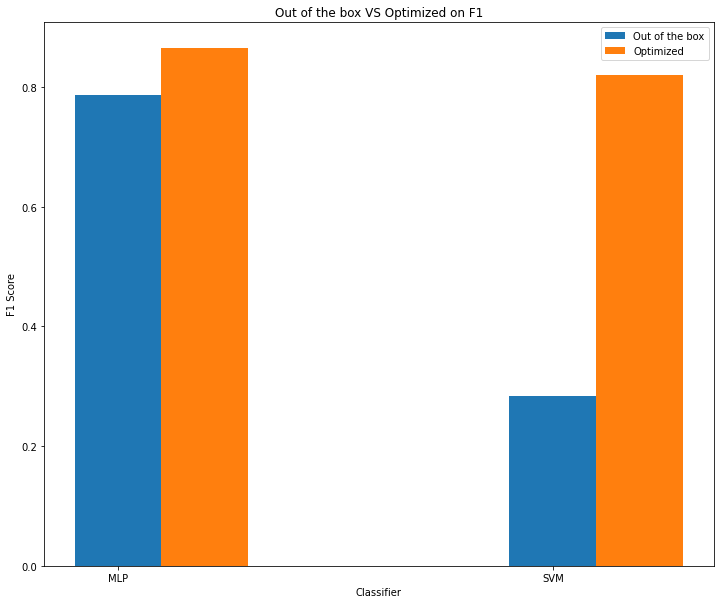

In [ ]:
plt.figure(figsize = (12, 10))
labels = ["MLP", "SVM"]
indices = np.arange(len(labels))
width = 0.20
plt.bar(indices, clf_oob, width = width, label = 'Out of the box')
plt.bar(indices + width, clf_opt, width = width, label = 'Optimized')
plt.xticks(ticks = indices, labels = labels)
plt.legend()
plt.xlabel("Classifier")
plt.ylabel("F1 Score")
plt.title("Out of the box VS Optimized on F1")
plt.show()

#### Τεκμηρίωση της Διαδικασίας

Η λογική ήταν να δοκιμάσουμε αρχικά αρκετές υπερπαραμέτρους και για κάθε μία να δοκιμάσουμε τη default τιμή, αρκετά μεγαλύτερες και αρκετά μικρότερες. 

Όταν παρατηρούσαμε ότι η υπερπαράμετρος δεν παρουσίαζε σημαντική επηρροή στα αποτελέσματα για πολύ διαφορετικές τιμές της, θεωρούσαμε ότι δεν χρειάζεται να εξετάζεται από το Optuna. 

Από την άλλη, για υπερπαραμέτρους για τις οποίες η μεταβολή των τιμων επηρέαζε την επίδοση, επιλέγαμε ένα εύρος γύρω από την τιμή που έδινε καλύτερο αποτέλεσμα και επαναλαμβάναμε τη διαδικασία.

Επίσης υπήρχαν υπερπαραμέροι για τις οποίες ήταν ξεκάθαρο ποιά τιμή έδινε καλύτερο αποτέλεσμα. Για παράδειγμα για τον MLP η Relu ήταν με διαφορά η πιο αποδοτική activation function. 

Παράλληλα υπήρχαν τιμές υπερπαραμέτρων οι οποίες έδιναν σταθερά χειρότερα αποτελέσμτα. Για παράδειγμα για τον SVM η sigmoid ήταν με διαφορά η χειρότερη δυνατή επιλογή ως kernel type.

Σχετικά με τη μορφή του pipeline, χρησιμοποιήθηκαν τα 4 στάδια του pipeline (sampler, scaler, pca, selector) σε διάφορες αλληλουχίες μέχρι να καταλήξουμε στην τελική μορφή.

Ακόμη, φάνηκε ότι σε κάθε περίπτωση όλα τα 23 χαρακτηριστικά ήταν απαραίτητα αφού οποιαδήποτε παράληψη χαρακτηριστικού είχε αρνητική επίδραση στην απόδοση.

#### Παρατηρήσεις:
* Για τον MLP ταξινομητή ακόμα και η out-of-the-box υλοποίηση έδινε αρκετά ικανοποιητικά αποτελέσματα. Μετά από τις διάφορες δοκιμές που έγιναν για βελτιστοποίηση καταφέραμε να ξεπεράσουμε την τιμή 0.865 η οποία είναι ικανοποιητική. Αυτό συμβαίνει διότι από τα δεδομένα που υπάρχουν στο dataset για πολλές παρτίδες είναι δύσκολο ακόμα και για τον άνθρωπο να εκτιμήσει σωστά το αποτέλεσμα. Επίσης ο παράγοντας της μπλόφας σε παιχνίδια πόκερ είναι δύσκολο να συνυπολογιστεί από το νευρωνικό δίκτυο με μεγάλη ακρίβεια.

* Για τον SVM η out-of-the-box υλοποίηση έδινε απελπιστικά αποτελέσματα. Με διάφορες δοκιμές που έγιναν κατά τη βελτιστοποίηση καταφέραμε να αυξήσουμε σημαντικά την επίδοση. Παρόλα αυτά οι επιδόσεις του παρέμειναν σταθερά πιο κάτω από του MLP, παράλληλα ήταν πολύ πιο χρονοβόρα διαδικασία.

#### Συμπέρασμα

Για το συγκεκριμένο dataset φαίνεται ξεκάθαρα ότι η βέλτιστη επιλογή είναι ο MLP ταξινομητής αφού δίνει σταθερά καλύτερα αποτελέσματα σύμφωνα με τη μετρική F1 που χρησιμοποιήθηκε. Επίσης υπερτερεί σημαντικά στο χρόνο εκπαίδευσης διότι μπορεί να διαχειριστεί ολόκληρο το dataset σε μικρό συνολικά χρόνο ενώ ο SVM αδυνατούσε να το διαχειριστεί και χρειάστηκε να γίνει εκπαίδευση σε ένα sample του dataset. Από τις διάφορες δοκιμές που έγιναν δεν βρέθηκε κανένα κριτήριο σύμφωνα με το οποίο ο SVM να έχει καλύτερη επίδοση από τον MLP